# Selecting a Seattle Stay

## Description

As an active Airbnb guest, I am interested in what factors influence other guest reviews. The insight may benefit myself in making rental selections and hosts in improving their properties.

Questions:

1: What neighborhoods have the highest cleanliness review scores?

2: What property types have the highest cleanliness review scores?

3: Does cleanliness play a role in the overall review score?

Data can be accessed at www.kaggle.com/datasets/airbnb/seattle .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Cleaning and Analysis

In [2]:
df = pd.read_csv('listings.csv')
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

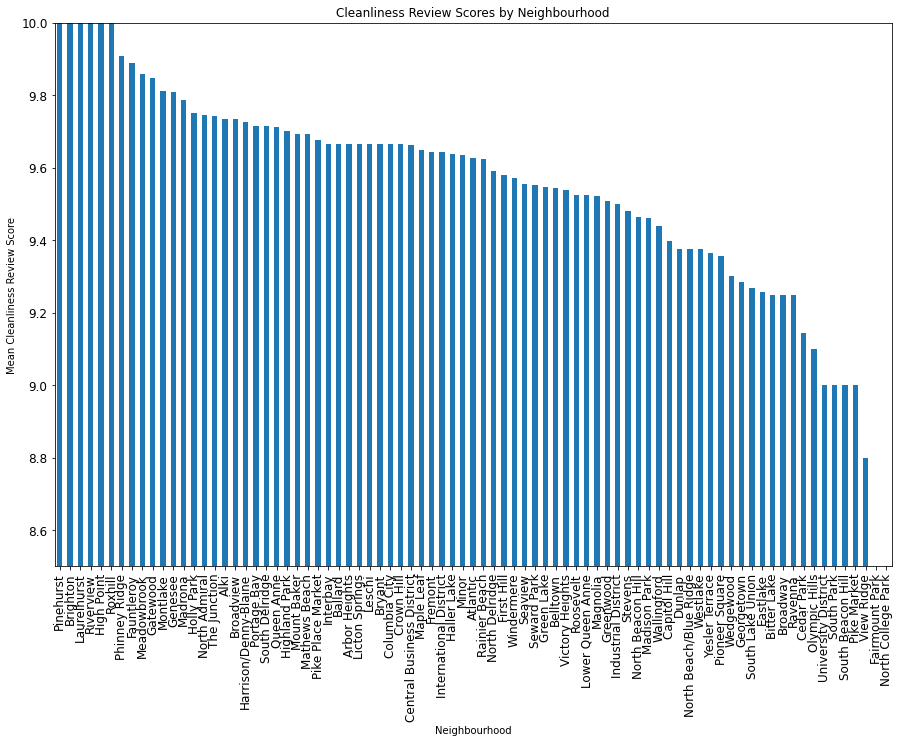

neighbourhood
Pinehurst                10.000000
Brighton                 10.000000
Laurelhurst              10.000000
Riverview                10.000000
High Point               10.000000
Roxhill                  10.000000
Phinney Ridge             9.906977
Fauntleroy                9.888889
Meadowbrook               9.857143
Gatewood                  9.846154
Montlake                  9.812500
Genesee                   9.807692
Madrona                   9.787879
Holly Park                9.750000
North Admiral             9.744186
The Junction              9.741935
Alki                      9.733333
Broadview                 9.733333
Harrison/Denny-Blaine     9.727273
Name: review_scores_cleanliness, dtype: float64


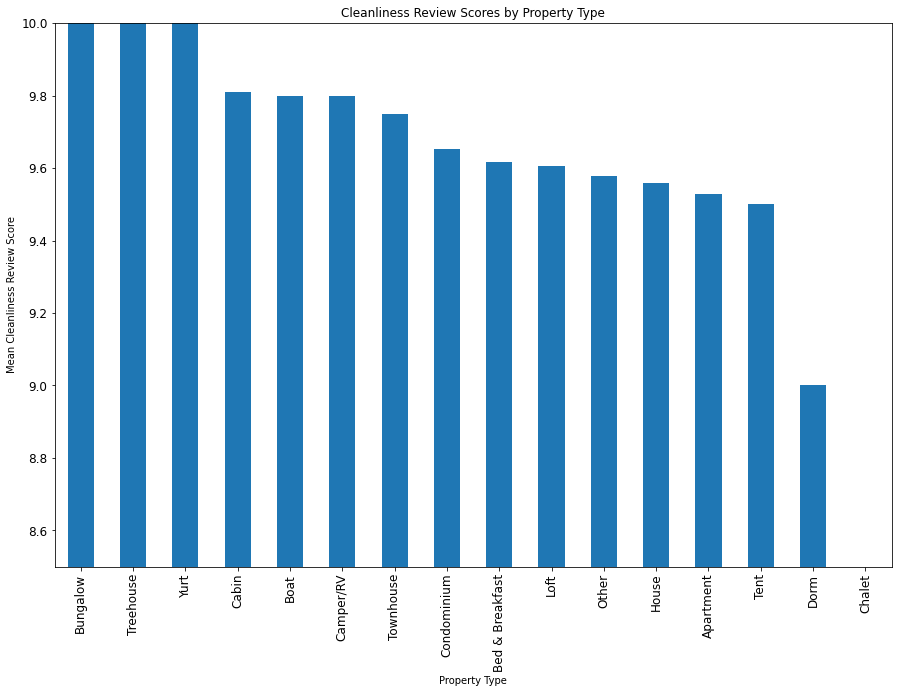

property_type
Bungalow     10.000000
Treehouse    10.000000
Yurt         10.000000
Cabin         9.809524
Name: review_scores_cleanliness, dtype: float64


In [3]:
df_grouped_by_column = lambda data, column_name: data.groupby([str(column_name)]).mean()['review_scores_cleanliness'].sort_values(ascending=False).fillna(5)
'''Returns argument data grouped by argument column_name with values sorted descending and missing values filled with 5.
   Missing data imputed with 5 under assumption that guests did not leave review because of neutral experience. 5 is in middle of scale 1-10.'''

def plot_df(data_grouped, xlab):
    '''Returns plot of argument data_grouped with x-axis column_name from df_grouped_by_column
    and y-axis mean cleanliness_review_score. Prints the upper quantile of sorted dataframe.'''
    data_grouped.plot.bar(
        fontsize = 12,
        title = 'Cleanliness Review Scores by ' + xlab,
        xlabel = xlab, 
        ylabel = 'Mean Cleanliness Review Score', 
        ylim = (8.5,10),
        figsize = (15, 10))
    plt.show()
    
    print(data_grouped[data_grouped > np.percentile(data_grouped, 75)])

# neighborhood and cleanliness review scores
df_neighborhood = df_grouped_by_column(data=df, column_name ='neighbourhood')
plot_df(df_neighborhood,  'Neighbourhood')

# property type and cleanliness review scores
df_property_type = df_grouped_by_column(data=df, column_name ='property_type')
plot_df(df_property_type,  'Property Type')

By sorting to the cleanest property types, I have my criteria for confidently choosing a clean Airbnb.

Pinehurst. Brighton, Laurelhurst, Riverview, High Point, and Roxhill neighbourhoods have perfect cleanliness review scores.

Bungalow, Treehouse, Yurt, and Cabin are the best options for cleanest property types.

Combining these, I know which property types to filter to and what neighborhoods to select.

In [4]:
# Correlation between cleanliness review score and overall review scores?
# Data imputed with 5 under assumption that guests did not leave review because of neutral experience. 5 is in middle of scale 1-10.
X = df.review_scores_cleanliness.fillna(5).values.reshape(len(df.review_scores_cleanliness.values),1)
y = df.review_scores_value.fillna(5).values.reshape(len(df.review_scores_value.values),1)

In [5]:
from sklearn import linear_model
regr = linear_model.LinearRegression() 
#fits linear model with coefficients to minimize residual sum of squares between observed and predicted targets


regr.fit(X,y)

LinearRegression()

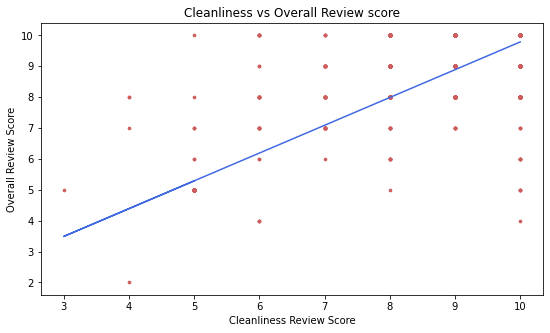

In [6]:
plt.figure(figsize = (9, 5))
plt.scatter(X, y, color = 'indianred', s = 7)
plt.plot(X, regr.predict(X), color = 'royalblue')
plt.title('Cleanliness vs Overall Review score')
plt.xlabel('Cleanliness Review Score')
plt.ylabel('Overall Review Score')
plt.show()


As cleanliness review scores increase, the overall review score increases in the visualization. Hosts may want to increase cleanliness in an attempt to increase overall review score.

## Evaluation and Findings

By sorting to the cleanest property types, I have criteria for confidently choosing a clean Airbnb. I will look for property types of Bungalow, Treehouse, Yurt, and Cabin in neighbourhoods Pinehurst. Brighton, Laurelhurst, Riverview, High Point, and Roxhill. The specifications are tailored to the highest cleanliness review scores.

Additionally, cleanliness review scores tend to increase with overall review scores based on the visualization. The observation may be helpful to hosts when deciding whether to prioritize cleaning. 
